In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wnl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import csv

__Download nltk resources__

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SyedHamza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SyedHamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data

In [4]:
df = pd.read_csv("archive/IMDB Dataset.csv")
print(df.iloc[0,0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [5]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


## Data Preprocessing

__Definfing preprocessing methods__

In [6]:
# Intialize Lemmetizer
lemmatizer = wnl()

# Gets the set of stopwords
stop_words = set(stopwords.words("english"))

def remove_html_tags(sentence_string):
    
    """
    sentence_string: A sentence as a string.
    returns: sentence string with tags removed
    """
    
    clean_text = re.sub(r'<.*?>', '', sentence_string)
    
    return clean_text

def remove_stop_words(sentence_list):
    
    """
    sentence_list: Sentence as a list of words, where each word is string.
    returns: sentence as list of words with stopwords removed.
    
    """
    return [word for word in sentence_list if word not in stop_words]

def lemmatize_sentence(sentence_list):
    """
    sentence_list: Sentence as a list of words, where each word is string.
    returns: sentence as list of lemmatzed words.
    
    """
    return [lemmatizer.lemmatize(word) for word in sentence_list]

In [7]:
# Encoder for encoding string labels to integers
label_encoder = preprocessing.LabelEncoder()


# vectorizer that creates bag of words features from each sentence. 
# The vocabuulary is created by selecting the 2000 most occuring words accross sentneces. 
# This also takes care of lowercasing. 
vectorizer = CountVectorizer(max_features=6000,binary=True)


__Applying preprocessing__

In [8]:
reviews = df.review
reviews = reviews.map(remove_html_tags) # remove html tags
reviews = reviews.map(lambda x:x.split()) # Tokenize
reviews = reviews.map(remove_stop_words) # remove stopwords
reviews = reviews.map(lemmatize_sentence) # lemmatize
reviews = reviews.map(lambda x: ' '.join(x)) # create a sentnece by joining the list of words. This is the expected format for sckit fit transform

In [9]:
# Create bag of words fearures from sentences
X = vectorizer.fit_transform(list(reviews))

# Convert text labels to integers
label_encoder.fit(df.sentiment)
target_names=label_encoder.classes_
print(target_names)
labels=label_encoder.transform(df.sentiment)

['negative' 'positive']


In [10]:
reviews.head(5)

0    One reviewer mentioned watching 1 Oz episode h...
1    A wonderful little production. The filming tec...
2    I thought wonderful way spend time hot summer ...
3    Basically there's family little boy (Jake) thi...
4    Petter Mattei's "Love Time Money" visually stu...
Name: review, dtype: object

__Data split__

In [11]:
total_examples = X.shape[0]
split = int(0.8*total_examples)

X_train = X[:split] 
X_test = X[split:]
y_train = labels[:split]
y_test  = labels[split:]

X_train.shape,y_train.shape

((40000, 6000), (40000,))

## Modeling

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)



metrics =pd.DataFrame(
    {
        "Accuracy" : [round(accuracy_score(y_test,pred),3)],
        "Precision" : [round(precision_score(y_test,pred),3)],
        "Recall" : [round(recall_score(y_test,pred),3)],
        "F1-Score" : [round(f1_score(y_test,pred),3)]
    }

)
metrics

,Accuracy,Precision,Recall,F1-Score
0,0.872,0.872,0.872,0.872


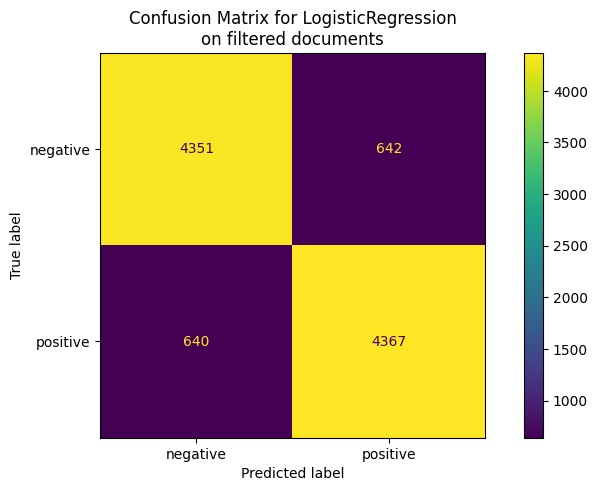

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non filtered documents"
)

## Submission file(s)

#### Preprocessed data
- I have excluded the bag of words, and label transformations from the data that will be written to the file below.

In [ ]:
import csv

# Sample data
data = [
    {"review": "John Doe", "sentiment": 28},
]


In [73]:
len(reviews.tolist()),len(df.sentiment.tolist())

(50000, 50000)

In [15]:
data = []
for review, sentiment in zip(reviews.tolist(),df.sentiment.tolist()):
    data.append({"review":review, "sentiment":sentiment})
data[:1]

[{'review': "One reviewer mentioned watching 1 Oz episode hooked. They right, exactly happened me.The first thing struck Oz brutality unflinching scene violence, set right word GO. Trust me, show faint hearted timid. This show pull punch regard drugs, sex violence. Its hardcore, classic use word.It called OZ nickname given Oswald Maximum Security State Penitentary. It focus mainly Emerald City, experimental section prison cell glass front face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealing shady agreement never far away.I would say main appeal show due fact go show dare. Forget pretty picture painted mainstream audiences, forget charm, forget romance...OZ mess around. The first episode I ever saw struck nasty surreal, I say I ready it, I watched more, I developed taste Oz, got accustomed high level graphic violence. Not violence, injustice (crooked guard who'll sold nickel

In [16]:
# Specify the CSV file name
filename = "preprocessed_data.csv"

# Writing to CSV
with open(filename, mode='w', newline='',encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=["review", "sentiment"])
    
    # Write the header
    writer.writeheader()
    
    # Write the data rows
    writer.writerows(data)

print(f"Data successfully written to {filename}")


Data successfully written to preprocessed_data.csv
